In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import imgaug.augmenters as iaa
import os
from PIL import Image
import numpy as np
import imagehash
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [16]:
#Load the dataset
dataset_path = r'C:\Users\Tamilselvi.R\OneDrive\Desktop\try_1'

In [17]:
datagen = ImageDataGenerator(
    rescale=1./255,  
    validation_split=0.2  
)

# Create training data generator
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),  
    batch_size=32,          
    class_mode='categorical', 
    subset='training'         
)

Found 205 images belonging to 4 classes.


In [18]:
# Create validation data generator
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),  
    batch_size=32,
    class_mode='categorical',
    subset='validation'    
)  
print(train_generator.class_indices)

Found 49 images belonging to 4 classes.
{'facade': 0, 'foundation': 1, 'interior': 2, 'superstructure': 3}


In [21]:
# %%
# Paths to directories
extracted_directory = r'C:\Users\Tamilselvi.R\OneDrive\Desktop\try_1'
processed_directory = r'C:\Users\Tamilselvi.R\OneDrive\Desktop\try_resize'
os.makedirs(processed_directory, exist_ok=True)


In [22]:
# Define target size for resizing
target_size = (800, 800)  
def normalize_image(image):
    """Normalize image to [0, 1] range and convert back to 8-bit image."""
    img_array = np.array(image)  
    normalized_array = img_array / 255.0  
    return Image.fromarray((normalized_array * 255).astype(np.uint8))  

def resize_image(image, size):
    """Resize image to the specified size."""
    return image.resize(size, Image.LANCZOS)  

def get_image_hash(image):
    """Compute the hash of an image to identify duplicates."""
    return imagehash.average_hash(image)

def process_images():
    seen_hashes = set()
    for root, dirs, files in os.walk(extracted_directory):
        relative_path = os.path.relpath(root, extracted_directory)
        save_path = os.path.join(processed_directory, relative_path)
        os.makedirs(save_path, exist_ok=True)

        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    # Normalize the image
                    normalized_img = normalize_image(img)
                    # Resize the normalized image
                    resized_img = resize_image(normalized_img, target_size)
                    # Compute the hash of the image
                    img_hash = get_image_hash(resized_img)
                    
                    if img_hash not in seen_hashes:
                        seen_hashes.add(img_hash)
                        processed_image_path = os.path.join(save_path, file)
                        resized_img.save(processed_image_path)
                        print(f"Processed and saved: {processed_image_path}")
                    else:
                        print(f"Duplicate image skipped: {file_path}")
            except Exception as e:
                print(f"Skipping file {file_path} due to error: {e}")
process_images()
print("Image preprocessing complete!")


Processed and saved: C:\Users\Tamilselvi.R\OneDrive\Desktop\try_resize\facade\014c3a021aec90da79a6178aa1d8f8b1.jpg
Processed and saved: C:\Users\Tamilselvi.R\OneDrive\Desktop\try_resize\facade\067847474f28f4d623adf3b3d70d064d.jpg
Processed and saved: C:\Users\Tamilselvi.R\OneDrive\Desktop\try_resize\facade\0c7003b11bc642c02da9b3b057a4b4e6.jpg
Processed and saved: C:\Users\Tamilselvi.R\OneDrive\Desktop\try_resize\facade\220e2784-6fab-4864-9f0b-e3f72009792c.jpg
Processed and saved: C:\Users\Tamilselvi.R\OneDrive\Desktop\try_resize\facade\240_F_208995542_X1lcxLAhLDNxVjn1A0Dxg8G1iCmIO2gm.jpg
Processed and saved: C:\Users\Tamilselvi.R\OneDrive\Desktop\try_resize\facade\240_F_462718147_7pooYUGaX8IkEO5Lk0sEZHXGoNoAIszI.jpg
Processed and saved: C:\Users\Tamilselvi.R\OneDrive\Desktop\try_resize\facade\240_F_629313698_JBhjzTB78SmGdKoFB9TbTo7WII7gHwwo.jpg
Processed and saved: C:\Users\Tamilselvi.R\OneDrive\Desktop\try_resize\facade\240_F_753896184_PZVNoIzNsxPO3M9gBsrfBh0olmDVGtro.jpg
Processed an

In [ ]:
# %%
# Define augmentation sequence
seq = iaa.Sequential([
    iaa.AdditiveGaussianNoise(scale=(0, 0.1*255)),  
    iaa.Multiply((0.8, 1.2)),  
    iaa.ContrastNormalization((0.75, 1.5)), 
])
# %%
# Paths to directories
processed_directory = r'C:\Users\Tamilselvi.R\OneDrive\Desktop\try_resize'
augmented_directory = r'C:\Users\Tamilselvi.R\OneDrive\Desktop\try_aug'
os.makedirs(augmented_directory, exist_ok=True)
seq = iaa.Sequential([
    iaa.AdditiveGaussianNoise(scale=(0, 0.1*255)),  
    iaa.Multiply((0.8, 1.2)),  
    iaa.ContrastNormalization((0.75, 1.5)),  
])

c:\Users\Tamilselvi.R\AppData\Local\Programs\Python\Python311\Lib\site-packages\imgaug\imgaug.py:184: DeprecationWarning: Function `ContrastNormalization()` is deprecated. Use `imgaug.contrast.LinearContrast` instead.
  warn_deprecated(msg, stacklevel=3)


In [ ]:
def augment_images():
    for root, dirs, files in os.walk(processed_directory):
        relative_path = os.path.relpath(root, processed_directory)
        save_path = os.path.join(augmented_directory, relative_path)
        os.makedirs(save_path, exist_ok=True)

        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img_array = np.array(img)
                    for i in range(4):
                        augmented_img_array = seq.augment_image(img_array)
                        augmented_image = Image.fromarray(augmented_img_array)
                        augmented_image_path = os.path.join(save_path, f"{os.path.splitext(file)[0]}_aug_{i}.jpg")
                        augmented_image.save(augmented_image_path)
                        print(f"Augmented and saved: {augmented_image_path}")
            except Exception as e:
                print(f"Skipping file {file_path} due to error: {e}")
augment_images()
print("Image augmentation complete!")

Augmented and saved: C:\Users\Tamilselvi.R\OneDrive\Desktop\try_aug\facade\014c3a021aec90da79a6178aa1d8f8b1_aug_0.jpg
Augmented and saved: C:\Users\Tamilselvi.R\OneDrive\Desktop\try_aug\facade\014c3a021aec90da79a6178aa1d8f8b1_aug_1.jpg
Augmented and saved: C:\Users\Tamilselvi.R\OneDrive\Desktop\try_aug\facade\014c3a021aec90da79a6178aa1d8f8b1_aug_2.jpg
Augmented and saved: C:\Users\Tamilselvi.R\OneDrive\Desktop\try_aug\facade\014c3a021aec90da79a6178aa1d8f8b1_aug_3.jpg
Augmented and saved: C:\Users\Tamilselvi.R\OneDrive\Desktop\try_aug\facade\067847474f28f4d623adf3b3d70d064d_aug_0.jpg
Augmented and saved: C:\Users\Tamilselvi.R\OneDrive\Desktop\try_aug\facade\067847474f28f4d623adf3b3d70d064d_aug_1.jpg
Augmented and saved: C:\Users\Tamilselvi.R\OneDrive\Desktop\try_aug\facade\067847474f28f4d623adf3b3d70d064d_aug_2.jpg
Augmented and saved: C:\Users\Tamilselvi.R\OneDrive\Desktop\try_aug\facade\067847474f28f4d623adf3b3d70d064d_aug_3.jpg
Augmented and saved: C:\Users\Tamilselvi.R\OneDrive\Desk

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import imgaug.augmenters as iaa
import os
from PIL import Image
import numpy as np
import imagehash
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [26]:
# %%
# Paths to directories
from sklearn.model_selection import train_test_split
augmented_directory = r'C:\Users\Tamilselvi.R\OneDrive\Desktop\try_aug'
split_directory = r'C:\Users\Tamilselvi.R\OneDrive\Desktop\try_split'
train_directory = os.path.join(split_directory, 'train')
test_directory = os.path.join(split_directory, 'test')
os.makedirs(train_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)

def split_data():
    for subdir in os.listdir(augmented_directory):
        subdir_path = os.path.join(augmented_directory, subdir)
        if os.path.isdir(subdir_path):
            # Create corresponding directories for train and test
            train_subdir = os.path.join(train_directory, subdir)
            test_subdir = os.path.join(test_directory, subdir)
            os.makedirs(train_subdir, exist_ok=True)
            os.makedirs(test_subdir, exist_ok=True)
            files = [f for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))]
            
            # Split the files into training and testing
            train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)
            
            for file in train_files:
                shutil.copy(os.path.join(subdir_path, file), os.path.join(train_subdir, file))
            for file in test_files:
                shutil.copy(os.path.join(subdir_path, file), os.path.join(test_subdir, file))
            
            print(f"Split data for {subdir} into train and test sets")
split_data()
print("Data split into training and testing sets complete!")


Split data for facade into train and test sets
Split data for foundation into train and test sets
Split data for interior into train and test sets
Split data for superstructure into train and test sets
Data split into training and testing sets complete!


In [28]:

# Paths to directories
train_directory = r'C:\Users\Tamilselvi.R\OneDrive\Desktop\try_split\train'
test_directory = r'C:\Users\Tamilselvi.R\OneDrive\Desktop\try_split\test'
train_datagen = ImageDataGenerator(
    rescale=1./255,           
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(150, 150),    
    batch_size=32,
    class_mode='categorical'  
)
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 933 images belonging to 4 classes.
Found 330 images belonging to 4 classes.


In [29]:
# %%
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  
])


c:\Users\Tamilselvi.R\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# %%
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# %%
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)




Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 722ms/step - accuracy: 0.3466 - loss: 1.4103 - val_accuracy: 0.5750 - val_loss: 0.9756
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4688 - loss: 1.1129 - val_accuracy: 0.6000 - val_loss: 1.0446
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 701ms/step - accuracy: 0.6111 - loss: 0.9221 - val_accuracy: 0.7500 - val_loss: 0.6934
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5938 - loss: 0.9037 - val_accuracy: 0.9000 - val_loss: 0.5869
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 699ms/step - accuracy: 0.6670 - loss: 0.7402 - val_accuracy: 0.7375 - val_loss: 0.5935
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8125 - loss: 0.5983 - val_accuracy: 0.7000 - val_loss: 0.5754
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 625ms/step - accuracy: 0.7470 - loss: 0.5987 - val_accuracy: 0.9125 - val_loss: 0.3531
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8438 - loss: 0.4622 - val_accuracy: 0.9000

In [35]:
# Save the training history
np.save('history.npy', history.history)  # Save the history

In [34]:
# %%
# Save the model
model.save('cnn_classification_model1.h5')
print("Model training complete and saved as cnn_classification_model.h5")


Model training complete and saved as cnn_classification_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 345ms/step - accuracy: 0.9729 - loss: 0.1040


Test loss: 0.12437409162521362
Test accuracy: 0.965624988079071
Model training complete and saved as cnn_classification_model.h5


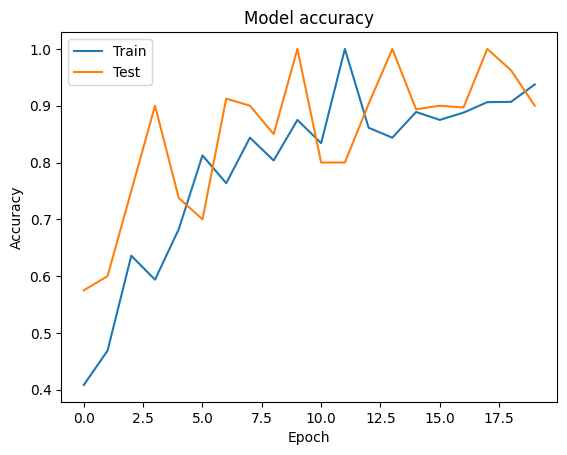

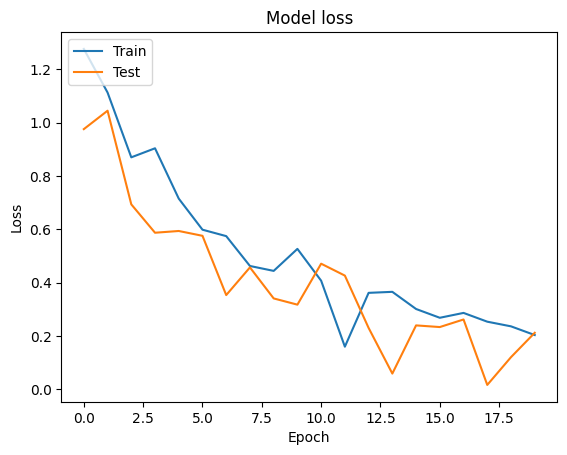

In [ ]:
# %%
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')
# %%
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()




Found 933 images belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Predicted class: foundation


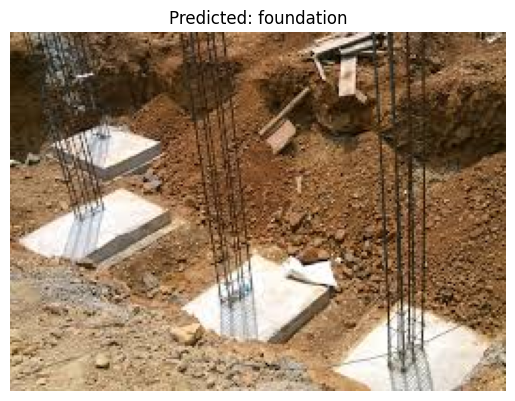

In [32]:
# %%
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load your trained model
model = tf.keras.models.load_model('cnn_classification_model1.h5')
def preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0 
    return img_array
def predict_class(img_path, model):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    return predicted_class
def get_class_names(train_generator):
    class_labels = train_generator.class_indices
    return list(class_labels.keys())
# Path to your test image
img_path = r'C:\Users\Tamilselvi.R\Downloads\verify10.jpg'  

train_directory = r'C:\Users\Tamilselvi.R\OneDrive\Desktop\try_split\train'
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(150, 150),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)
class_names = get_class_names(train_generator)
# Predict the class of the test image
predicted_class_index = predict_class(img_path, model)
predicted_class_name = class_names[predicted_class_index]
print(f'Predicted class: {predicted_class_name}')
# Display the test image
def show_image(img_path):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {predicted_class_name}')
    plt.show()

show_image(img_path)


Found 330 images belonging to 4 classes.


c:\Users\Tamilselvi.R\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 360ms/step


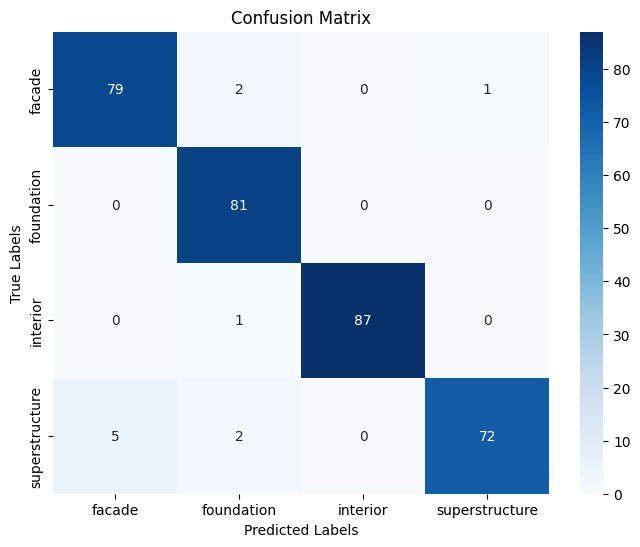

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the test data using ImageDataGenerator (or use your existing data generator)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    r'C:\Users\Tamilselvi.R\OneDrive\Desktop\try_split\test',  # Replace with your test data directory
    target_size=(150, 150),  # Image size should match what was used for training
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Ensure data is not shuffled to match true labels
)
# Predict the labels for the test data
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
# True labels
y_true = test_generator.classes
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [7]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Define the directories
base_dir = r'C:\Users\Tamilselvi.R\OneDrive\Desktop\try_aug'  # Base folder containing the subfolders
folders = ['facade', 'foundation', 'interior', 'superstructure']  # Subfolders containing images
image_size = (150, 150)  # Replace with the image size used for training
model_path = 'cnn_classification_model.h5'  # Replace with your CNN model file

# Load the CNN model
model = load_model(model_path)

# Create an empty DataFrame to store results
results = pd.DataFrame(columns=['Image', 'Class'])

# Preprocess and classify images
for folder in folders:
    folder_path = os.path.join(base_dir, folder)  # No 'images' subfolder, directly accessing subfolder
    print(f"Checking folder: {folder_path}")  # Debugging line to check folder paths
    if os.path.exists(folder_path):
        for img_name in os.listdir(folder_path):
            if img_name.endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(folder_path, img_name)
                
                # Load and preprocess the image
                img = image.load_img(img_path, target_size=image_size)
                img_array = image.img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
                img_array /= 255.0  # Normalize (adjust this if your model expects different preprocessing)
                
                # Predict the class
                predictions = model.predict(img_array)
                predicted_class = np.argmax(predictions, axis=-1)[0]  # Get the index of the max prediction
                
                # Save the result (adjust class indices if necessary)
                class_label = folders[predicted_class]
                
                # Create a new row to add
                new_row = pd.DataFrame([[img_name, class_label]], columns=['Image', 'Class'])
                
                # Use pd.concat to add the new row to the results DataFrame
                results = pd.concat([results, new_row], ignore_index=True)
    else:
        print(f"Folder not found: {folder_path}")

# Save the results to a CSV file
results.to_csv('image_classification_result.csv', index=False)
print("Classification results saved to 'image_classification_results.csv'")


Checking folder: C:\Users\Tamilselvi.R\OneDrive\Desktop\try_aug\facade
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━